In [ ]:
Q-5. Uber is a taxi service provider as we know, we need to predict the high
booking area using an Unsupervised algorithm and price for the location using a
supervised algorithm and use some map function to display the data
Dataset This is the Dataset You can use this dataset for this question.


## 1. Defining the problem statement
In this project, we study the data of Uber which is present in tabular format in which we use different libraries like numpy, pandas and matplotlib and different machine learning algorithms.

We study different columns of the table and try to co-relate them with others and find a relation between those two.

We try to find and analyze those key factors like date, month etc which helps Uber Company to enhance their business by focusing on those services and make required changes.

In [ ]:
#Loading dataset

import pandas as pd
df = pd.read_csv("rideshare_kaggle.csv")

In [3]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [ ]:
# EDA

In [5]:
df.shape

(693071, 57)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [8]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [9]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [10]:
# Feature engineering 

In [11]:
#Ploting

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import pandas as pd

<AxesSubplot:xlabel='price', ylabel='name'>

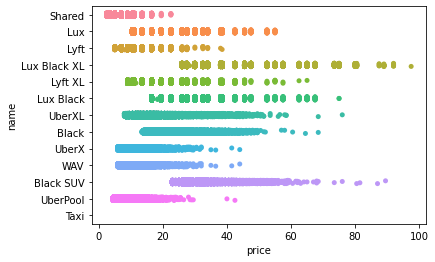

In [13]:
# strip plot
sns.stripplot(data=df, x='price', y='name')

<AxesSubplot:xlabel='surge_multiplier', ylabel='source'>

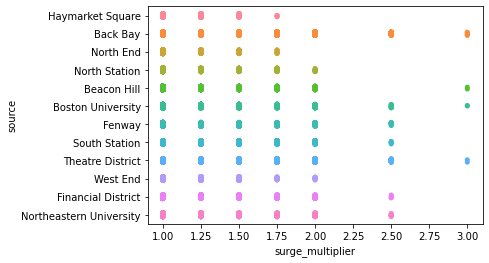

In [15]:
sns.stripplot(data=df, x='surge_multiplier', y='source')

<AxesSubplot:xlabel='surge_multiplier', ylabel='hour'>

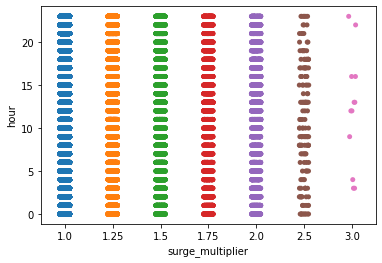

In [17]:
sns.stripplot(data=df, x='surge_multiplier', y='hour')

In [19]:
# Converting timestamp to datetime value
df['timestamp'].head()

0    1.544953e+09
1    1.543284e+09
2    1.543367e+09
3    1.543554e+09
4    1.543463e+09
Name: timestamp, dtype: float64

In [20]:
from datetime import datetime
timestamp1 = 1544952608
timestamp2 = 1543284024
timestamp3 = 1543818483
timestamp4 = 1543594384
timestamp5 = 1544728504
dt_object1 = datetime.fromtimestamp(timestamp1)
dt_object2 = datetime.fromtimestamp(timestamp2)
dt_object3 = datetime.fromtimestamp(timestamp3)
dt_object4 = datetime.fromtimestamp(timestamp4)
dt_object5 = datetime.fromtimestamp(timestamp5)

print("dt_object =", dt_object1)
print("dt_object =", dt_object2)
print("dt_object =", dt_object3)
print("dt_object =", dt_object4)
print("dt_object =", dt_object5)

dt_object = 2018-12-16 15:00:08
dt_object = 2018-11-27 07:30:24
dt_object = 2018-12-03 11:58:03
dt_object = 2018-11-30 21:43:04
dt_object = 2018-12-14 00:45:04


So by this timestamp to datetime conversion we get to know that, our data is of the year 2018 and in the month of november and december only

<AxesSubplot:>

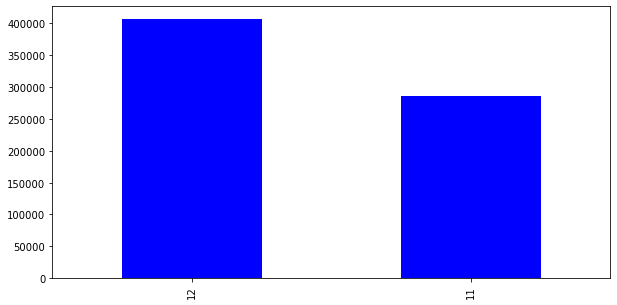

In [21]:
#Bar plots
df['month'].value_counts().plot(kind='bar', figsize=(10,5), color='blue')

<AxesSubplot:>

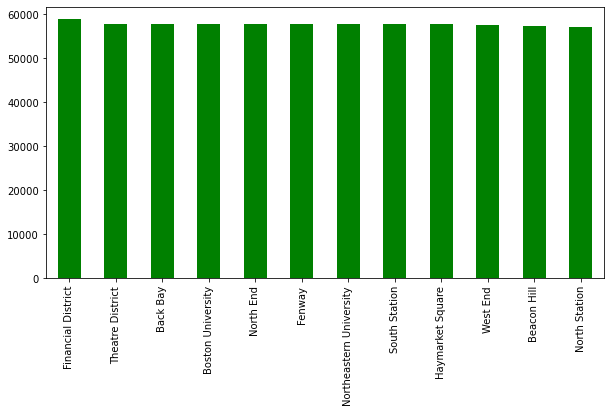

In [22]:
df['source'].value_counts().plot(kind='bar', figsize=(10,5), color='green')


<AxesSubplot:>

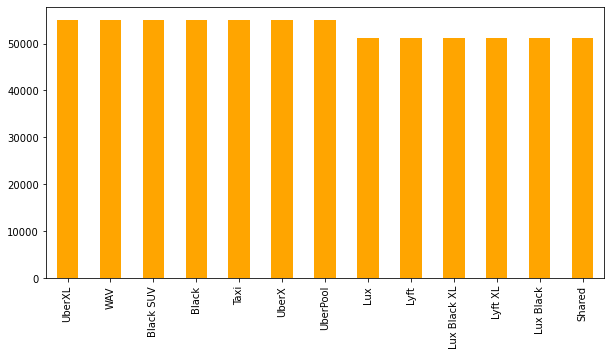

In [23]:
df['name'].value_counts().plot(kind='bar', figsize=(10,5), color='orange')


<AxesSubplot:>

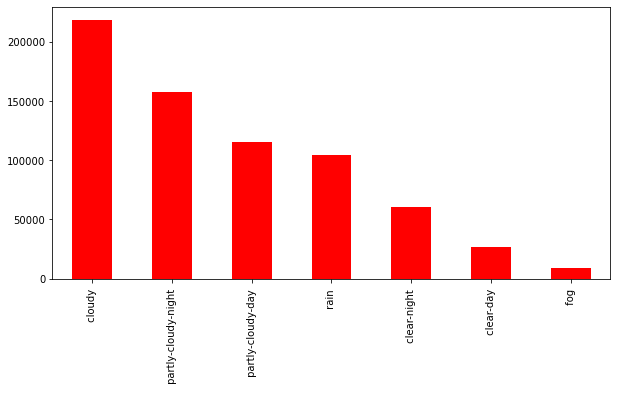

In [24]:
df['icon'].value_counts().plot(kind='bar', figsize=(10,5), color='red')


<AxesSubplot:>

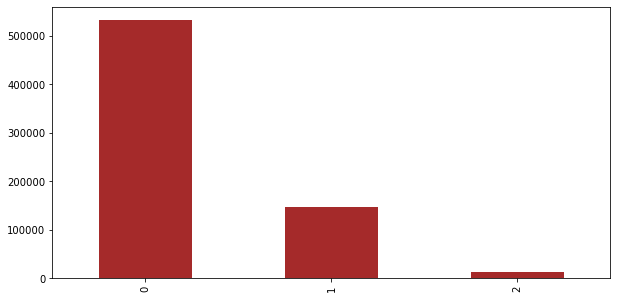

In [25]:
df['uvIndex'].value_counts().plot(kind='bar', figsize=(10,5), color='brown')


<AxesSubplot:>

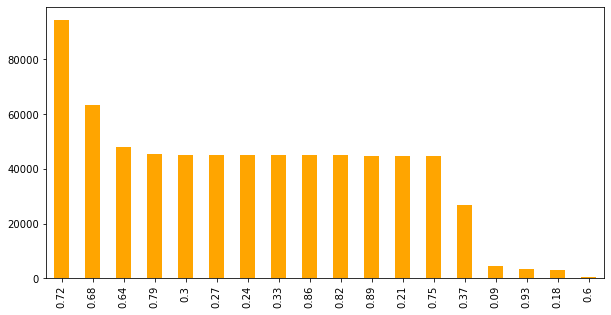

In [26]:
df['moonPhase'].value_counts().plot(kind='bar', figsize=(10,5), color='orange')


<AxesSubplot:>

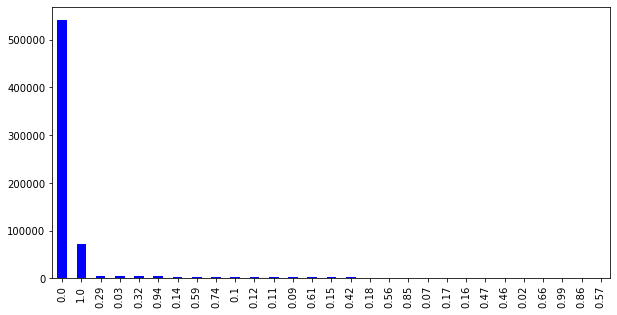

In [27]:
df['precipProbability'].value_counts().plot(kind='bar', figsize=(10,5), color='blue')


In [28]:
# Label Encoding

# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

In [29]:
df.dtypes

id                              object
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
timezone                        object
source                          object
destination                     object
cab_type                        object
product_id                      object
name                            object
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                   object
long_summary                    object
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

In [31]:
df['id']= label_encoder.fit_transform(df['id']) 
df['datetime']= label_encoder.fit_transform(df['datetime']) 
df['timezone']= label_encoder.fit_transform(df['timezone'])
df['destination']= label_encoder.fit_transform(df['destination']) 
df['product_id']= label_encoder.fit_transform(df['product_id'])
df['short_summary']= label_encoder.fit_transform(df['short_summary'])
df['long_summary']= label_encoder.fit_transform(df['long_summary'])

In [32]:
df['name']= label_encoder.fit_transform(df['name'])

print("Class mapping of Name: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Name: 
Black --> 0
Black SUV --> 1
Lux --> 2
Lux Black --> 3
Lux Black XL --> 4
Lyft --> 5
Lyft XL --> 6
Shared --> 7
Taxi --> 8
UberPool --> 9
UberX --> 10
UberXL --> 11
WAV --> 12


In [34]:
df['source']= label_encoder.fit_transform(df['source'])

print("Class mapping of Source: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Source: 
Back Bay --> 0
Beacon Hill --> 1
Boston University --> 2
Fenway --> 3
Financial District --> 4
Haymarket Square --> 5
North End --> 6
North Station --> 7
Northeastern University --> 8
South Station --> 9
Theatre District --> 10
West End --> 11


In [35]:
df['icon']= label_encoder.fit_transform(df['icon'])

print("Class mapping of Icon: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Icon: 
 clear-day  --> 0
 clear-night  --> 1
 cloudy  --> 2
 fog  --> 3
 partly-cloudy-day  --> 4
 partly-cloudy-night  --> 5
 rain  --> 6


In [37]:
df.dtypes

id                               int32
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                         int32
timezone                         int32
source                           int32
destination                      int32
cab_type                        object
product_id                       int32
name                             int32
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                    int32
long_summary                     int32
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

In [38]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,179271,1.544953e+09,9,16,12,25351,0,5,7,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,205021,1.543284e+09,2,27,11,961,0,5,7,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,411506,1.543367e+09,1,28,11,2534,0,5,7,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,527263,1.543554e+09,4,30,11,6988,0,5,7,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,606526,1.543463e+09,3,29,11,4400,0,5,7,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [43]:
df=df.drop("cab_type", axis =1)

In [44]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,product_id,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,179271,1.544953e+09,9,16,12,25351,0,5,7,8,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,205021,1.543284e+09,2,27,11,961,0,5,7,12,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,411506,1.543367e+09,1,28,11,2534,0,5,7,7,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,527263,1.543554e+09,4,30,11,6988,0,5,7,10,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,606526,1.543463e+09,3,29,11,4400,0,5,7,11,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [45]:
# Filling NAN Values

df.isnull().sum()


id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
visibility                         0
t

In [46]:
df['price'].median()

13.5

In [47]:
df["price"].fillna(13.5, inplace = True) 

In [49]:
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatur

In [50]:
df['price'] = df['price'].astype(int)


In [51]:
df['price'].head()


0     5
1    11
2     7
3    26
4     9
Name: price, dtype: int32

In [69]:
## RFE (Recursive Feature Elimination)


import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

In [54]:
X = df.drop('price', axis = 1)
y = df['price']

In [55]:
X.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,product_id,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,179271,1.544953e+09,9,16,12,25351,0,5,7,8,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,205021,1.543284e+09,2,27,11,961,0,5,7,12,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,411506,1.543367e+09,1,28,11,2534,0,5,7,7,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,527263,1.543554e+09,4,30,11,6988,0,5,7,10,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,606526,1.543463e+09,3,29,11,4400,0,5,7,11,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [56]:
y.head()

0     5
1    11
2     7
3    26
4     9
Name: price, dtype: int32

In [57]:
X.shape

(693071, 55)

In [58]:
y.shape

(693071,)

<AxesSubplot:>

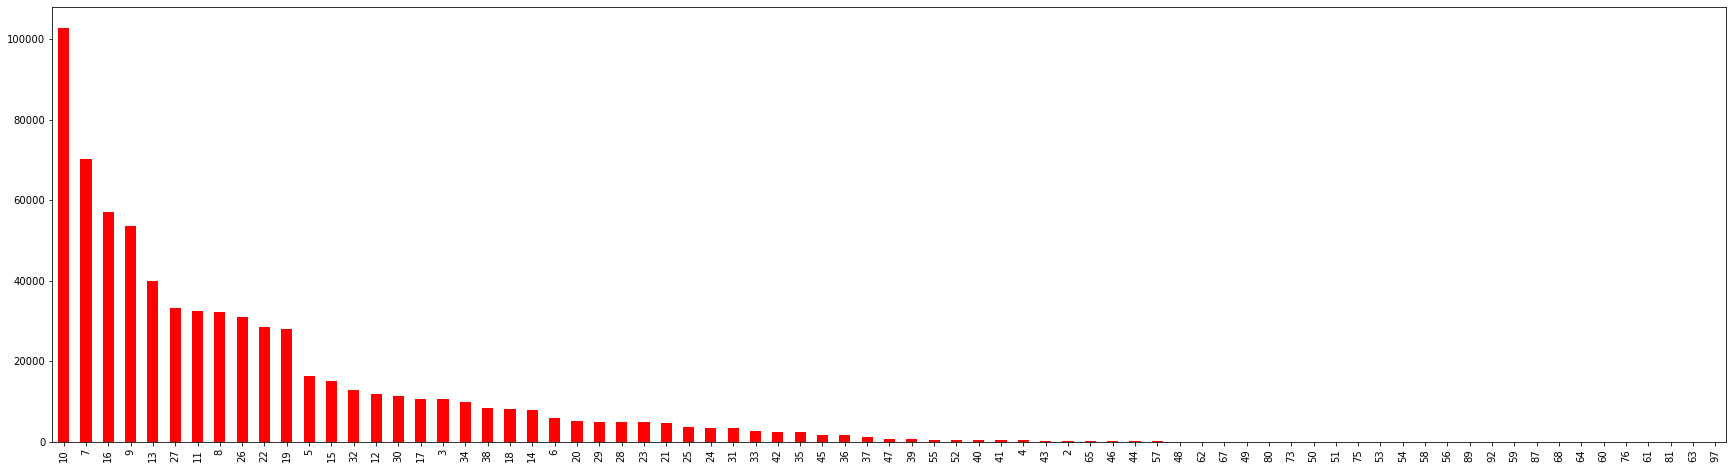

In [59]:
y.value_counts().plot(kind='bar',figsize=(30,8),color='red')

In [60]:
## Training accuracy in 56 features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [62]:
X_train.shape

(554456, 55)

In [63]:
X_test.shape

(138615, 55)

In [64]:
y_train.shape

(554456,)

In [65]:
y_test.shape

(138615,)

In [66]:
#Creating model
reg = LinearRegression()
#Fitting training data
reg = reg.fit(X_train, y_train)

In [67]:
reg.score(X_train, y_train)

0.4928447447234797

In [135]:
## Training accuracy in 40 features

from sklearn.feature_selection import RFE
import numpy as np

# Create an instance of RFE
rfe = RFE(estimator=reg, n_features_to_select=40)

# Fit RFE to the data
rfe.fit(X, y)



RFE(estimator=LinearRegression(), n_features_to_select=40)

In [136]:
XX = X[X.columns[rfe.support_]]

In [137]:
XX.head()

,hour,day,month,source,destination,product_id,name,distance,surge_multiplier,latitude,...,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,5,7,8,7,0.44,1.0,42.2148,...,10.000,303.8,1544962084,1544994864,0.30,0.1276,39.89,43.68,33.73,38.07
1,2,27,11,5,7,12,2,0.44,1.0,42.2148,...,4.786,291.1,1543232969,1543266992,0.64,0.1300,40.49,47.30,36.20,43.92
2,1,28,11,5,7,7,5,0.44,1.0,42.2148,...,10.000,315.7,1543319437,1543353364,0.68,0.1064,35.36,47.55,31.04,44.12
3,4,30,11,5,7,10,4,0.44,1.0,42.2148,...,10.000,291.1,1543492370,1543526114,0.75,0.0000,34.67,45.03,30.30,38.53
4,3,29,11,5,7,11,6,0.44,1.0,42.2148,...,10.000,347.7,1543405904,1543439738,0.72,0.0001,33.10,42.18,29.11,35.75


In [138]:
XX.columns

Index(['hour', 'day', 'month', 'source', 'destination', 'product_id', 'name',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'temperatureHigh', 'temperatureLow',
       'apparentTemperatureHigh', 'apparentTemperatureLow', 'icon', 'dewPoint',
       'pressure', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone',
       'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax',
       'temperatureMin', 'temperatureMax', 'apparentTemperatureMin',
       'apparentTemperatureMax'],
      dtype='object')

In [139]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.3, random_state = 20,)

In [140]:
X_train.shape

(485149, 40)

In [141]:
#Creating model
reg1 = LinearRegression()
#Fitting training data
reg1 = reg1.fit(X_train, y_train)
#Y prediction
Y_pred = reg1.predict(X_test)

In [142]:
reg1.score(X_train, y_train)

0.49225650797222764

Since we find the accuracy for k = 56 , 40 , 25 and 15.
Hence we noticed that the when k = 25 we get the maximum training accuracy in Linear Regression Model

In [143]:
# 40 Columns After RFE
XX.columns


Index(['hour', 'day', 'month', 'source', 'destination', 'product_id', 'name',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'temperatureHigh', 'temperatureLow',
       'apparentTemperatureHigh', 'apparentTemperatureLow', 'icon', 'dewPoint',
       'pressure', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone',
       'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax',
       'temperatureMin', 'temperatureMax', 'apparentTemperatureMin',
       'apparentTemperatureMax'],
      dtype='object')

In [150]:
# Drop Useless Features
new_df = XX.drop(['dewPoint','latitude', 'longitude', 'temperature',
       'pressure', 'cloudCover', 'visibility.1', 'ozone',
       'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax',
       'temperatureMin', 'temperatureMax', 'apparentTemperatureMin',
       'apparentTemperatureMax','hour', 'day','distance',], axis=1)

new_df.columns

Index(['month', 'source', 'destination', 'product_id', 'name',
       'surge_multiplier', 'apparentTemperature', 'short_summary',
       'long_summary', 'precipIntensity', 'precipProbability', 'humidity',
       'windSpeed', 'windGust', 'visibility', 'temperatureHigh',
       'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow',
       'icon', 'uvIndex'],
      dtype='object')

In [151]:
ndf = new_df.drop(['apparentTemperature', 'short_summary',
       'long_summary', 'precipIntensity', 'precipProbability', 'humidity',
       'windSpeed', 'windGust', 'visibility', 'temperatureHigh',
       'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow'], axis = 1)

In [152]:
ndf.columns

Index(['month', 'source', 'destination', 'product_id', 'name',
       'surge_multiplier', 'icon', 'uvIndex'],
      dtype='object')

In [153]:
# Binning

month_mapping = {11: 0, 12: 1}
ndf['month'] = ndf['month'].map(month_mapping)


In [154]:
surge_multiplier_mapping = {1.: 0, 1.25: 1, 1.5: 2, 1.75: 3, 2.:4}
ndf['surge_multiplier'] = ndf['surge_multiplier'].map(surge_multiplier_mapping)

In [155]:
# Final Dataset
ndf.head()
ndf.surge_multiplier

,month,source,destination,product_id,name,surge_multiplier,icon,uvIndex
0,1,5,7,8,7,0.0,5,0
1,0,5,7,12,2,0.0,6,0
2,0,5,7,7,5,0.0,1,0
3,0,5,7,10,4,0.0,1,0
4,0,5,7,11,6,0.0,5,0


In [156]:
# Model buildiing

In [157]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xx_train, xx_test, yy_train, yy_test = train_test_split(ndf, y, test_size = 0.2, random_state = 42)

In [158]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [165]:
linear = LinearRegression()
linear.fit(xx_train, yy_train)
linear.score(xx_test, yy_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [160]:
ndf.isnull().sum()

month                 0
source                0
destination           0
product_id            0
name                  0
surge_multiplier    166
icon                  0
uvIndex               0
dtype: int64

In [163]:
ndf['surge_multiplier'].median()

0.0

In [164]:
ndf["surge_multiplier"].fillna(0.0, inplace = True) 

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').